# Assignment 1: Data Versioning and Differential Privacy Pt. 2
## ADSP 32021 IP01 Machine Learning Operations
#### Maria Clarissa Fionalita
Canvas Assignment Pages:

- [Assignment 1: Data Versioning and Differential Privacy](https://canvas.uchicago.edu/courses/52013/assignments/586652)
- [Hint for the assignment](https://edstem.org/us/courses/48613/discussion/3583746)
- [Intro to Exploratory data analysis (EDA) in Python](https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python)

References:

- [Versioning Data with DVC (Hands-On Tutorial!)](https://www.youtube.com/watch?v=kLKBcPonMYw)
- [DVC Cheatsheet](https://derekchia.com/dvc/)
- [Install a module using pip for specific python version](https://stackoverflow.com/questions/10919569/install-a-module-using-pip-for-specific-python-version)

In [1]:
!git log --oneline

bfe075a (HEAD -> master) Updated V2 Data with total lift
3631c64 Updated V1 Data with total lift
3b2451b Data V2: removed outliers
581879d Data V1: removed irrelevant columns and encoded categorical variables
18eacf2 add raw athletes.csv
e890107 Configure remote storage


In [2]:
!python --version

Python 3.10.13


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Load Data

## Load V1

In [4]:
!git checkout 3631c64 data/athletes.csv.dvc
!dvc checkout
data = pd.read_csv("data/athletes.csv")
data.shape

Updated 0 paths from 2973ee2
Building workspace index                              |2.00 [00:00,  164entry/s]
Comparing indexes                                    |3.00 [00:00, 1.46kentry/s]
Applying changes                                      |0.00 [00:00,     ?file/s]
M       data/athletes.csv


(32172, 27)

# 3. For both versions calculate total_lift and divide dataset into train and test, keeping the same split ratio.

## 3.3 Train Test Split

In [5]:
def train_test_splitter(data, y_col = "total_lift", test_size = 0.2, train_size = 0.80, random_state = 42):
    if y_col in data.columns:
    
        X = data.drop(y_col, axis = 1)
        Y = data[y_col]
        return train_test_split(X, Y, test_size = test_size, train_size = train_size, random_state = random_state)
    
    if y_col not in data.columns:
        print("Target variable does not exist!")
        return [None] * 4

In [6]:
X_train, X_test, y_train, y_test = train_test_splitter(data = data, y_col = "foo")

Target variable does not exist!


# 4. Dataset Versioning using DVC

In [7]:
!git log --decorate --graph

* commit bfe075a7b27eda909f3e5a28a92d27a9a4e9d914 (HEAD -> master)
| Author: mariafshan <maria.c.fionalita@gmail.com>
| Date:   Mon Oct 16 19:22:33 2023 -0500
| 
|     Updated V2 Data with total lift
| 
* commit 3631c64a60472d6b223db08d38a7247d7d068ba1
| Author: mariafshan <maria.c.fionalita@gmail.com>
| Date:   Mon Oct 16 19:20:59 2023 -0500
| 
|     Updated V1 Data with total lift
| 
* commit 3b2451bf772293bdadbed06527aae27526b3bb9b
| Author: mariafshan <maria.c.fionalita@gmail.com>
| Date:   Mon Oct 16 19:14:26 2023 -0500
| 
|     Data V2: removed outliers
| 
* commit 581879d55b630ce9365dea2dccd7c9df8ceaf99d
| Author: mariafshan <maria.c.fionalita@gmail.com>
| Date:   Mon Oct 16 19:11:47 2023 -0500
| 
|     Data V1: removed irrelevant columns and encoded categorical variables
| 
* commit 18eacf2788db0634828cf6afdaee272655ba5cca
| Author: mariafshan <maria.c.fionalita@gmail.com>
| Date:   Mon Oct 16 19:08:40 2023 -0500
| 
|     add raw athletes.csv
| 
* commit e8901075e7484315dc33d5c

# 5. V1 EDA

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32172 entries, 0 to 32171
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         32172 non-null  float64
 1   height                      32172 non-null  float64
 2   weight                      32172 non-null  float64
 3   candj                       32172 non-null  float64
 4   snatch                      32172 non-null  float64
 5   deadlift                    32172 non-null  float64
 6   backsq                      32172 non-null  float64
 7   is_male                     32172 non-null  int64  
 8   region_Africa               32172 non-null  bool   
 9   region_Asia                 32172 non-null  bool   
 10  region_Australia            32172 non-null  bool   
 11  region_Canada East          32172 non-null  bool   
 12  region_Canada West          32172 non-null  bool   
 13  region_Central East         321

<Axes: title={'center': 'Distribution of Total Lift'}>

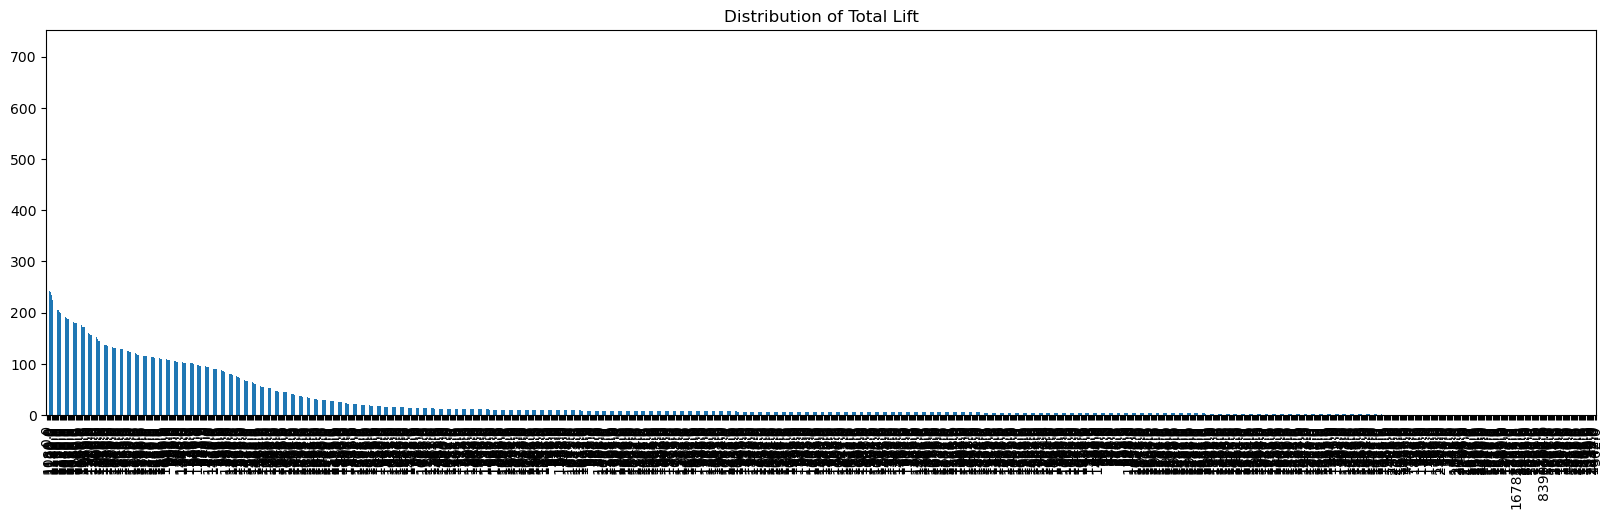

In [9]:
fig, ax = plt.subplots(figsize = (20, 5))

data["total_lift"].value_counts().plot(kind = "bar", title = "Distribution of Total Lift", ax = ax)

/tmp/ipykernel_3718/3538004476.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax, color = 'C12')


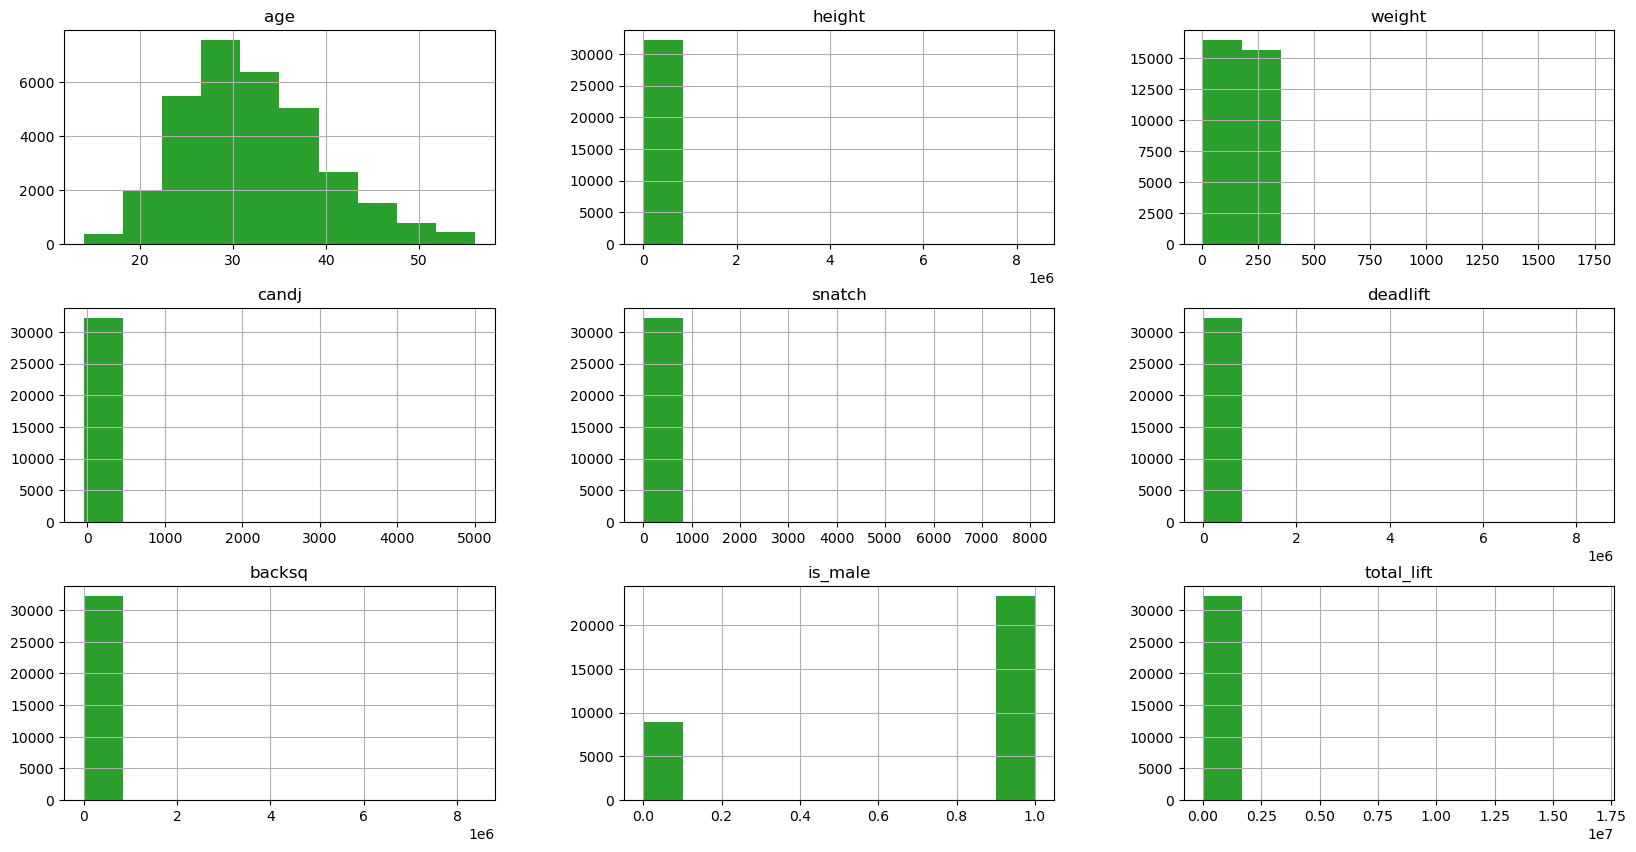

In [10]:
fig = plt.figure(figsize = (20, 10))
ax = fig.gca()
data.hist(ax = ax, color = 'C12')
plt.show()

<Axes: >

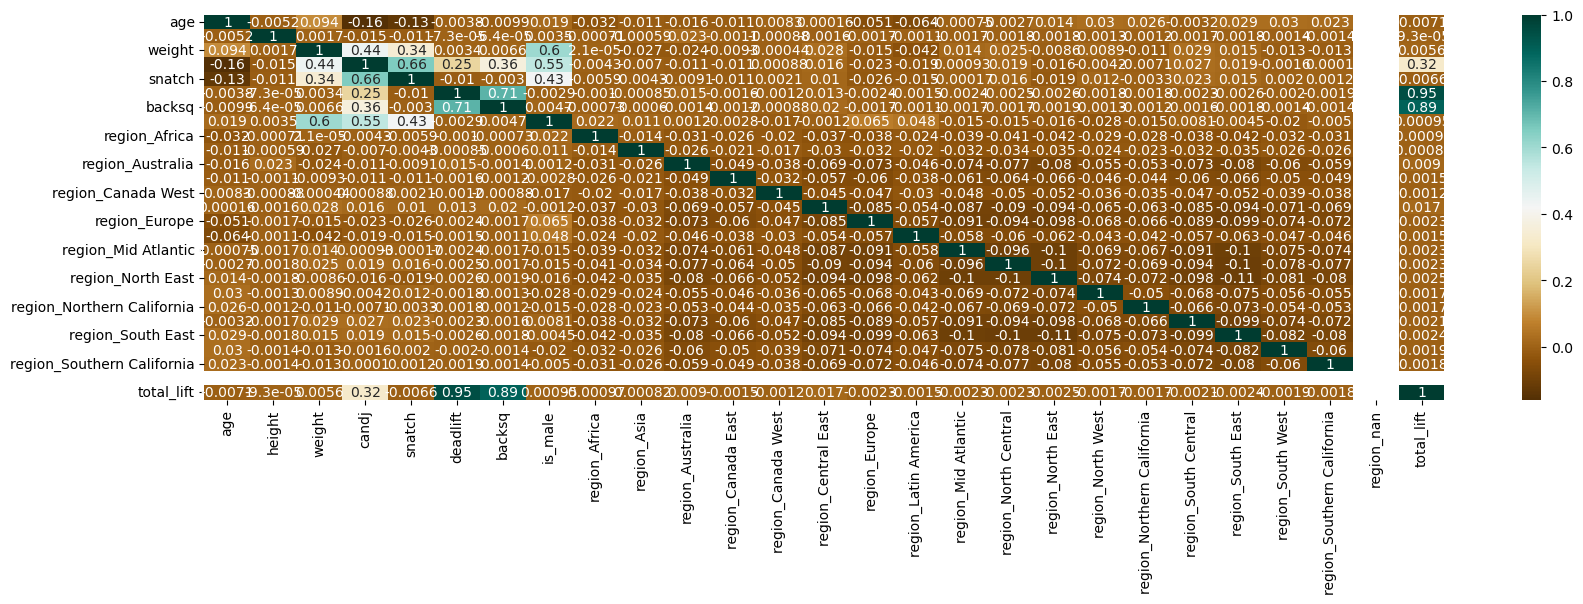

In [11]:
fig, ax = plt.subplots(figsize = (20, 5))

sns.heatmap(data.corr(numeric_only = True), cmap = "BrBG", annot = True, ax = ax)

# 6. Baseline Machine Learning to Predict Total Lift

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
baseline_model = LinearRegression()

In [14]:
def y_predict(data, model = baseline_model):
    X_train, X_test, y_train, y_test = train_test_splitter(data = data)
    
    model.fit(X_train, y_train)
    y_pred = baseline_model.predict(X_test)
    
    return X_train, X_test, y_train, y_test, y_pred

In [15]:
X_train, X_test, y_train, y_test, y_pred = y_predict(data = data)

# 7. Run metrics for this model.

In [16]:
versioning_metrics = dict()

In [17]:
versioning_metrics["v1"] = metrics.mean_squared_error(y_test, y_pred)

# 8. Update the dataset version to go to dataset v2 without changing anything else in the training code.

In [18]:
!git log --oneline

bfe075a (HEAD -> master) Updated V2 Data with total lift
3631c64 Updated V1 Data with total lift
3b2451b Data V2: removed outliers
581879d Data V1: removed irrelevant columns and encoded categorical variables
18eacf2 add raw athletes.csv
e890107 Configure remote storage


## Load V2

In [19]:
!git checkout bfe075a data/athletes.csv.dvc
!dvc checkout
data = pd.read_csv("data/athletes.csv")
data.shape

Updated 1 path from 8357cb4
Building workspace index                              |2.00 [00:00,  170entry/s]
Comparing indexes                                    |3.00 [00:00, 1.29kentry/s]
Applying changes                                      |0.00 [00:00,     ?file/s]
!
  0%|          |/mnt/d/UChicago/Q4/ADSP 32021 Machi0.00/? [00:00<?,        ?B/s]
  0%|          |/mnt/d/UChicago/Q4/ADSP 32021 M0.00/4.57M [00:00<?,        ?B/s]
Applying changes                                      |1.00 [00:00,  10.4file/s]
M       data/athletes.csv


(30848, 27)

# 9. Run EDA (exploratory data analysis) of dataset v2.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30848 entries, 0 to 30847
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         30848 non-null  float64
 1   height                      30848 non-null  float64
 2   weight                      30848 non-null  float64
 3   candj                       30848 non-null  float64
 4   snatch                      30848 non-null  float64
 5   deadlift                    30848 non-null  float64
 6   backsq                      30848 non-null  float64
 7   is_male                     30848 non-null  int64  
 8   region_Africa               30848 non-null  bool   
 9   region_Asia                 30848 non-null  bool   
 10  region_Australia            30848 non-null  bool   
 11  region_Canada East          30848 non-null  bool   
 12  region_Canada West          30848 non-null  bool   
 13  region_Central East         308

<Axes: title={'center': 'Distribution of Total Lift'}>

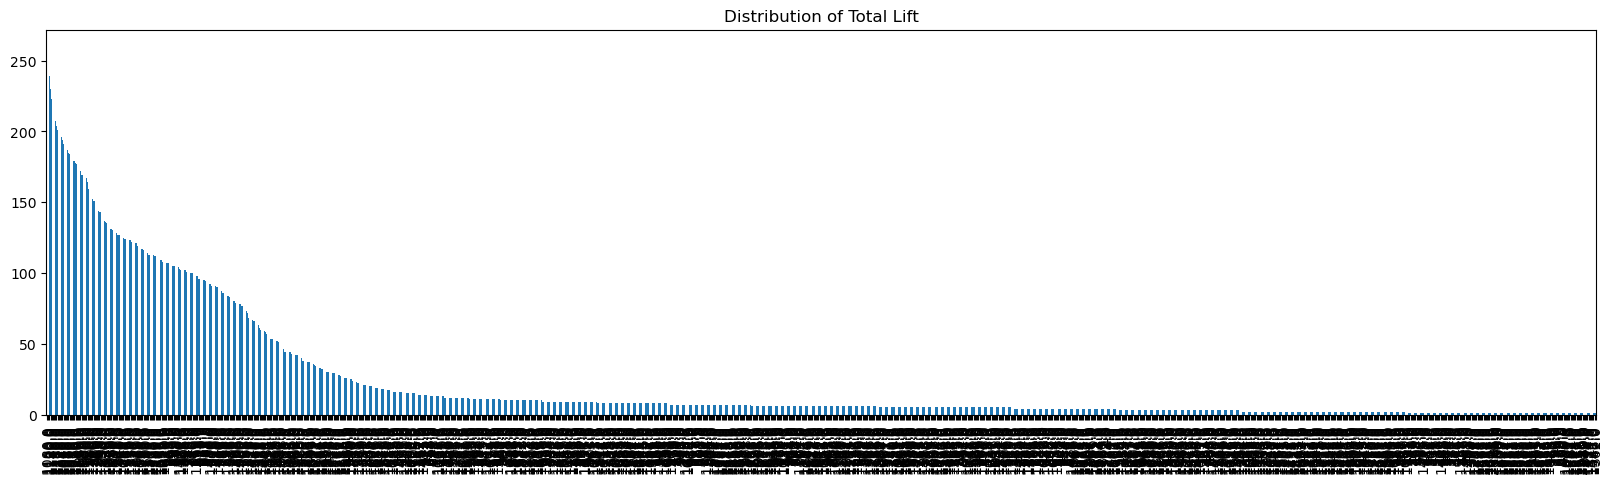

In [21]:
fig, ax = plt.subplots(figsize = (20, 5))

data["total_lift"].value_counts().plot(kind = "bar", title = "Distribution of Total Lift", ax = ax)

/tmp/ipykernel_3718/3538004476.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax, color = 'C12')


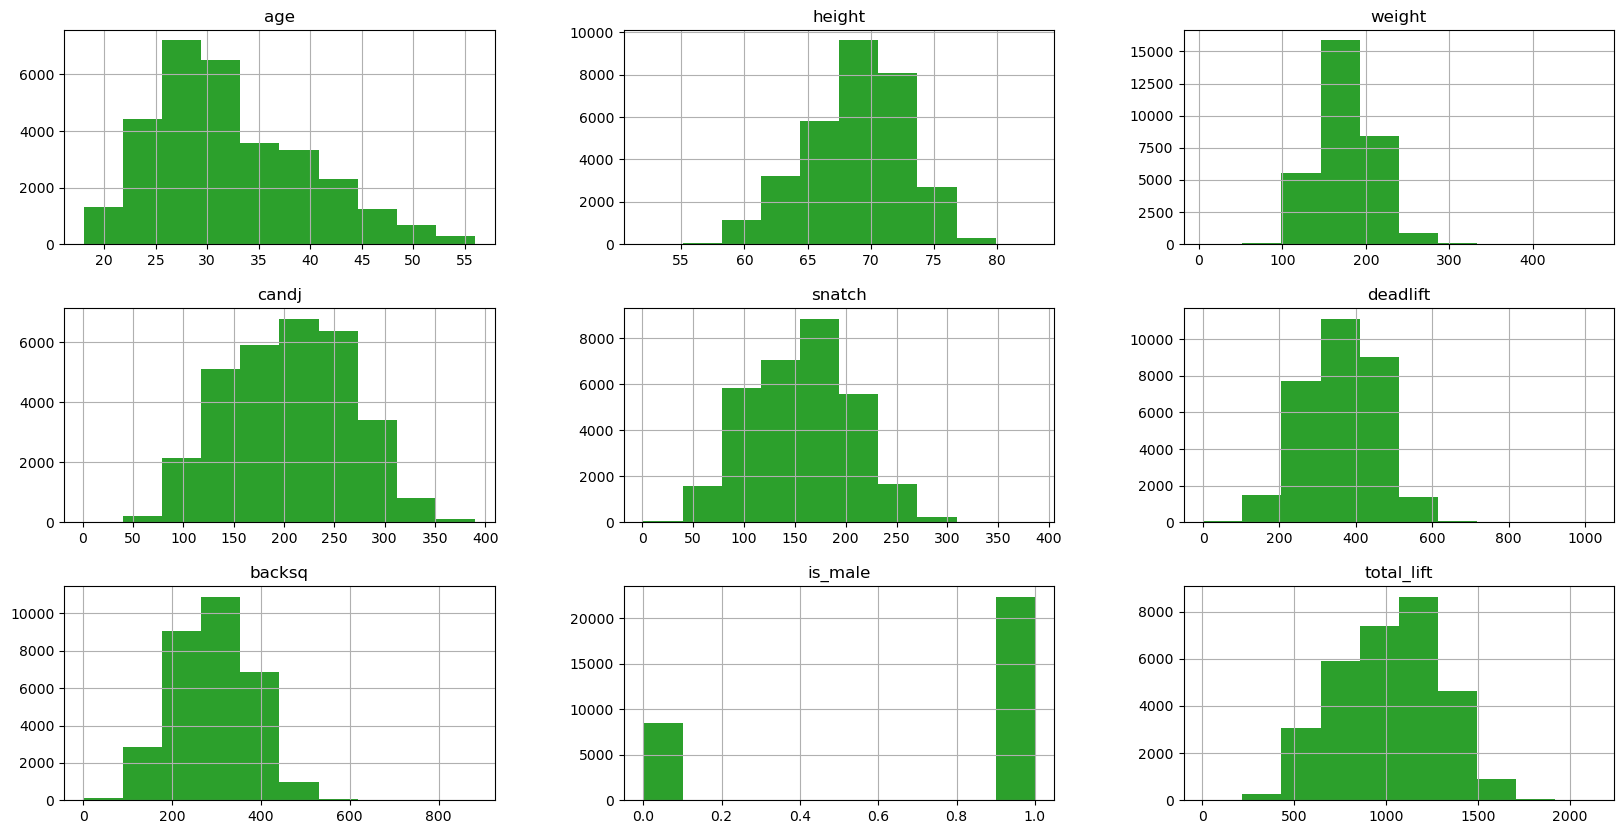

In [22]:
fig = plt.figure(figsize = (20, 10))
ax = fig.gca()
data.hist(ax = ax, color = 'C12')
plt.show()

<Axes: >

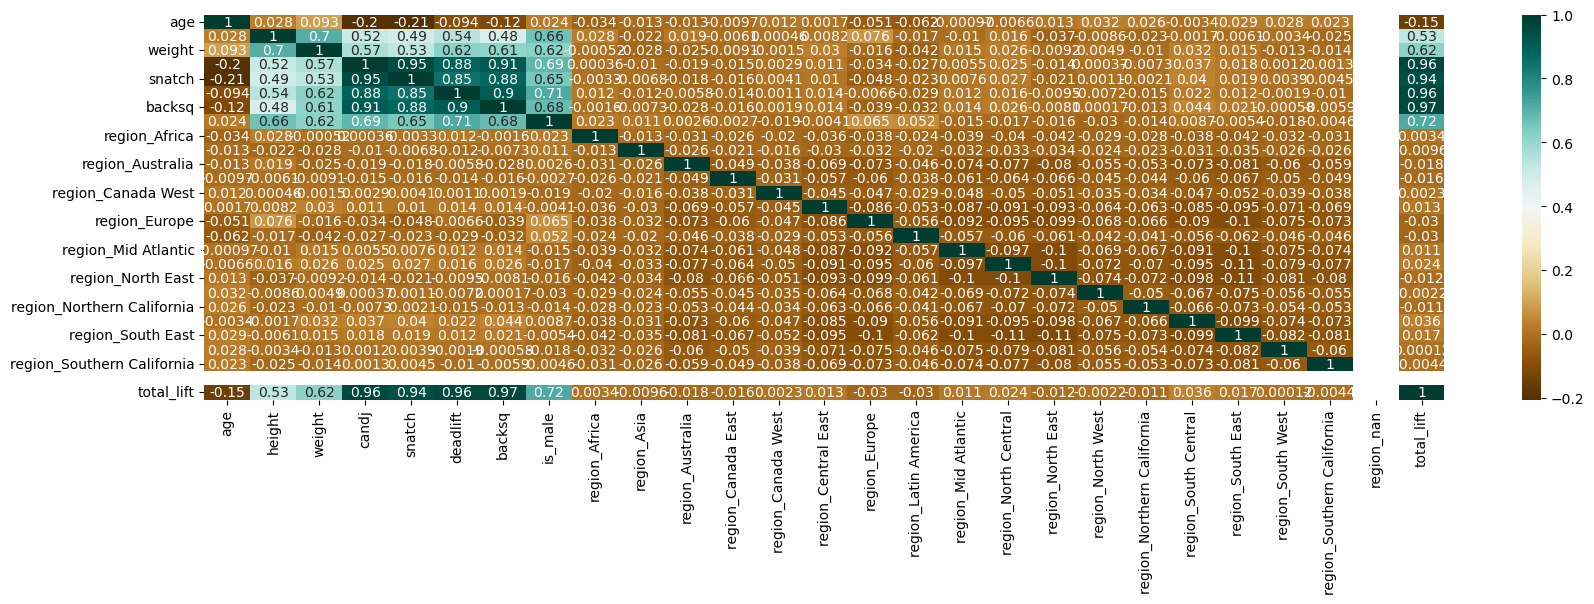

In [23]:
fig, ax = plt.subplots(figsize = (20, 5))

sns.heatmap(data.corr(numeric_only = True), cmap = "BrBG", annot = True, ax = ax)

# 10. Build a machine learning model with "new" dataset v2 to predict total_lift.

In [24]:
X_train, X_test, y_train, y_test, y_pred = y_predict(data = data)

# 11. Run metrics for this model.

In [25]:
versioning_metrics["v2"] = metrics.mean_squared_error(y_test, y_pred)

# 12. Compare and comment on the accuracy/ metrics of the models using v1 and v2.
Since the first model has higher mean error than the second model, that means the second data is more accurate at predicting total lift.

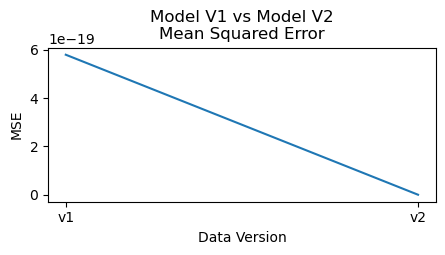

In [26]:
fig, ax = plt.subplots(figsize = (5, 2))
ax.plot([versioning_metrics["v1"], versioning_metrics["v2"]])

ax.set_title("Model V1 vs Model V2\nMean Squared Error")
ax.set_xticks([0, 1], ["v1", "v2"])
ax.set_ylabel("MSE")
ax.set_xlabel("Data Version")

plt.show()

In [27]:
print("Mean Squared Error for Data v1:", versioning_metrics["v1"])
print("Mean Squared Error for Data v2:", versioning_metrics["v2"])

if versioning_metrics["v1"] > versioning_metrics["v2"]:
    print("Model trained on data version 2 has better metric than model trained on data version 1")
elif versioning_metrics["v2"] > versioning_metrics["v1"]:
    print("Model trained on data version 1 has better metric than model trained on data version 2")

Mean Squared Error for Data v1: 5.8012918281961025e-19
Mean Squared Error for Data v2: 9.458791699802802e-25
Model trained on data version 2 has better metric than model trained on data version 1


# 13. Data Privacy
Use tensor flow privacy library with the dataset v2 and calculate the metrics for the new DP model.

https://www.tensorflow.org/responsible_ai/privacy/tutorials/classification_privacy

[PyDP](https://github.com/OpenMined/PyDP)

In [28]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
tf.get_logger().setLevel('ERROR')

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_privacy
from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy

2023-10-17 12:44:10.045586: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 12:44:10.087571: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-17 12:44:10.087606: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-17 12:44:10.087642: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-17 12:44:10.097082: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 12:44:10.098613: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

Instructions for updating:
non-resource variables are not supported in the long term


In [29]:
tf.__version__

'2.14.0'

## 13.1 TensorFlow Linear Regression
- [What Is Linear Regression? Explaining Concepts and Applications With Tensorflow 2.0.](https://builtin.com/data-science/linear-regression-tensorflow)
- [Linear regression with multiple inputs](https://www.tensorflow.org/tutorials/keras/regression#linear_regression_with_multiple_inputs)

In [30]:
baseline_model.fit(X_train, y_train)

LinearRegression()

### 13.1.1 Hyperparameters

#### Learning Model Hyperparametesrs

In [31]:
learning_rate = 0.01
epochs = 10
batch_size = 250
n_features = X_train.shape[1]

#### DP-SGD Privacy Hyperparametesrs

In [32]:
l2_norm_clip = 1.5
noise_multiplier = 1.3
num_microbatches = 1

### 13.1.2 Weights and Biases

In [33]:
weights = [baseline_model.coef_.reshape((n_features, 1))]
bias = tf.Variable(np.random.randn(), name="bias")

### 13.1.3 Convert the Baseline Model to TensorFlow

In [34]:
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = (n_features,), use_bias=False)  # Adjusted input shape and removed bias
])

### 13.1.4 Create Differential Privacy Optimizer

In [35]:
optimizer = tensorflow_privacy.DPKerasSGDOptimizer(
    l2_norm_clip = l2_norm_clip,
    noise_multiplier = noise_multiplier,
    num_microbatches = num_microbatches,
    learning_rate = learning_rate)

### 13.1.5 Compile and Train

#### Compile with the Differential Privacy Optimizer

In [36]:
tf_model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ["mse"])

#### Train the model using V2 data

In [37]:
# Train the TensorFlow model
tf_model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Train on 24678 samples
Epoch 1/10
15000/24678 [=================>............] - ETA: 0s - loss: 921476.7641 - mean_squared_error: 921476.6875  

2023-10-17 12:44:12.675413: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-17 12:44:12.697056: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-10-17 12:44:12.707715: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:382] MLIR V1 optimization pass is not enabled
2023-10-17 12:44:12.718421: W tensorflow/c/c_api.cc:305] Operation '{name:'training/SGD/momentum/Assign' id:259 op device:{requested: '', assigned: ''} def:{{{node training/SGD/momentum/Assign}} = AssignVariableOp[_has_manual_control_d

24678/24678 [==============================] - 0s 9us/sample - loss: 653891.4224 - mean_squared_error: 653891.3750
Epoch 2/10
24678/24678 [==============================] - 0s 8us/sample - loss: 12427.7118 - mean_squared_error: 12427.7109
Epoch 3/10
24678/24678 [==============================] - 0s 7us/sample - loss: 463.9139 - mean_squared_error: 463.9139
Epoch 4/10
24678/24678 [==============================] - 0s 7us/sample - loss: 419.0016 - mean_squared_error: 419.0015
Epoch 5/10
24678/24678 [==============================] - 0s 9us/sample - loss: 305.3448 - mean_squared_error: 305.3448
Epoch 6/10
24678/24678 [==============================] - 0s 7us/sample - loss: 302.7203 - mean_squared_error: 302.7203
Epoch 7/10
24678/24678 [==============================] - 0s 7us/sample - loss: 608.9846 - mean_squared_error: 608.9846
Epoch 8/10
24678/24678 [==============================] - 0s 8us/sample - loss: 561.3731 - mean_squared_error: 561.3731
Epoch 9/10
24678/24678 [=================

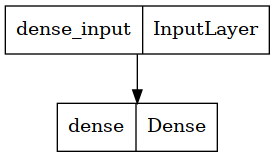

In [38]:
tf.keras.utils.plot_model(
    tf_model)

## 13.2 Metrics (Mean Squared Error)

In [39]:
versioning_metrics["v2_dp"] = metrics.mean_squared_error(y_test, tf_model.predict(X_test))
print(versioning_metrics["v2_dp"])

266.6753769495249


/home/mariafshan/miniconda3/envs/py10/lib/python3.10/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-10-17 12:44:14.698645: W tensorflow/c/c_api.cc:305] Operation '{name:'dense/MatMul' id:20 op device:{requested: '', assigned: ''} def:{{{node dense/MatMul}} = MatMul[T=DT_FLOAT, _has_manual_control_dependencies=true, transpose_a=false, transpose_b=false](dense_input, dense/MatMul/ReadVariableOp)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


# 14. Compute the DP $\varepsilon$ using TensorFlow privacy compute_dp_sgd_privacy
https://www.tensorflow.org/responsible_ai/privacy/tutorials/classification_privacy

In [40]:
print(tensorflow_privacy.compute_dp_sgd_privacy_statement(number_of_examples = X_train.shape[0],
                                                          batch_size=batch_size,
                                                          noise_multiplier=noise_multiplier,
                                                          num_epochs=epochs,
                                                          delta=1e-5))

DP-SGD performed over 24678 examples with 250 examples per iteration, noise
multiplier 1.3 for 10 epochs with microbatching, and no bound on number of
examples per user.

This privacy guarantee protects the release of all model checkpoints in addition
to the final model.

Example-level DP with add-or-remove-one adjacency at delta = 1e-05 computed with
RDP accounting:
    Epsilon with each example occurring once per epoch:        33.795
    Epsilon assuming Poisson sampling (*):                      6.820

No user-level privacy guarantee is possible without a bound on the number of
examples per user.

(*) Poisson sampling is not usually done in training pipelines, but assuming
that the data was randomly shuffled, it is believed the actual epsilon should be
closer to this value than the conservative assumption of an arbitrary data
order.



# 15. Compare and comment on the accuracy/ metrics of the non-DP and DP models using dataset v2.
The model trained on V2 data with differential privacy has the worst MSE/ metric.

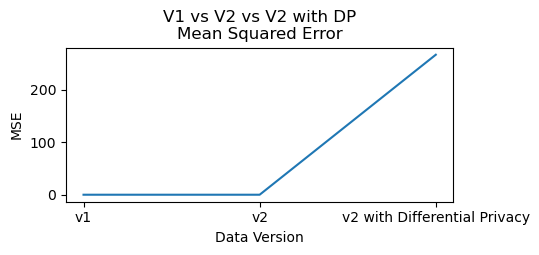

In [41]:
fig, ax = plt.subplots(figsize = (5, 2))
ax.plot([versioning_metrics["v1"], versioning_metrics["v2"], versioning_metrics["v2_dp"]])

ax.set_title("V1 vs V2 vs V2 with DP\nMean Squared Error")
ax.set_xticks([0, 1, 2], ["v1", "v2", "v2 with Differential Privacy"])
ax.set_ylabel("MSE")
ax.set_xlabel("Data Version")

plt.show()